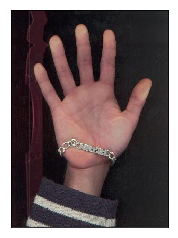

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy import ndimage

img=mpimg.imread('hand.jpg')
imgplot = plt.imshow(img)
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

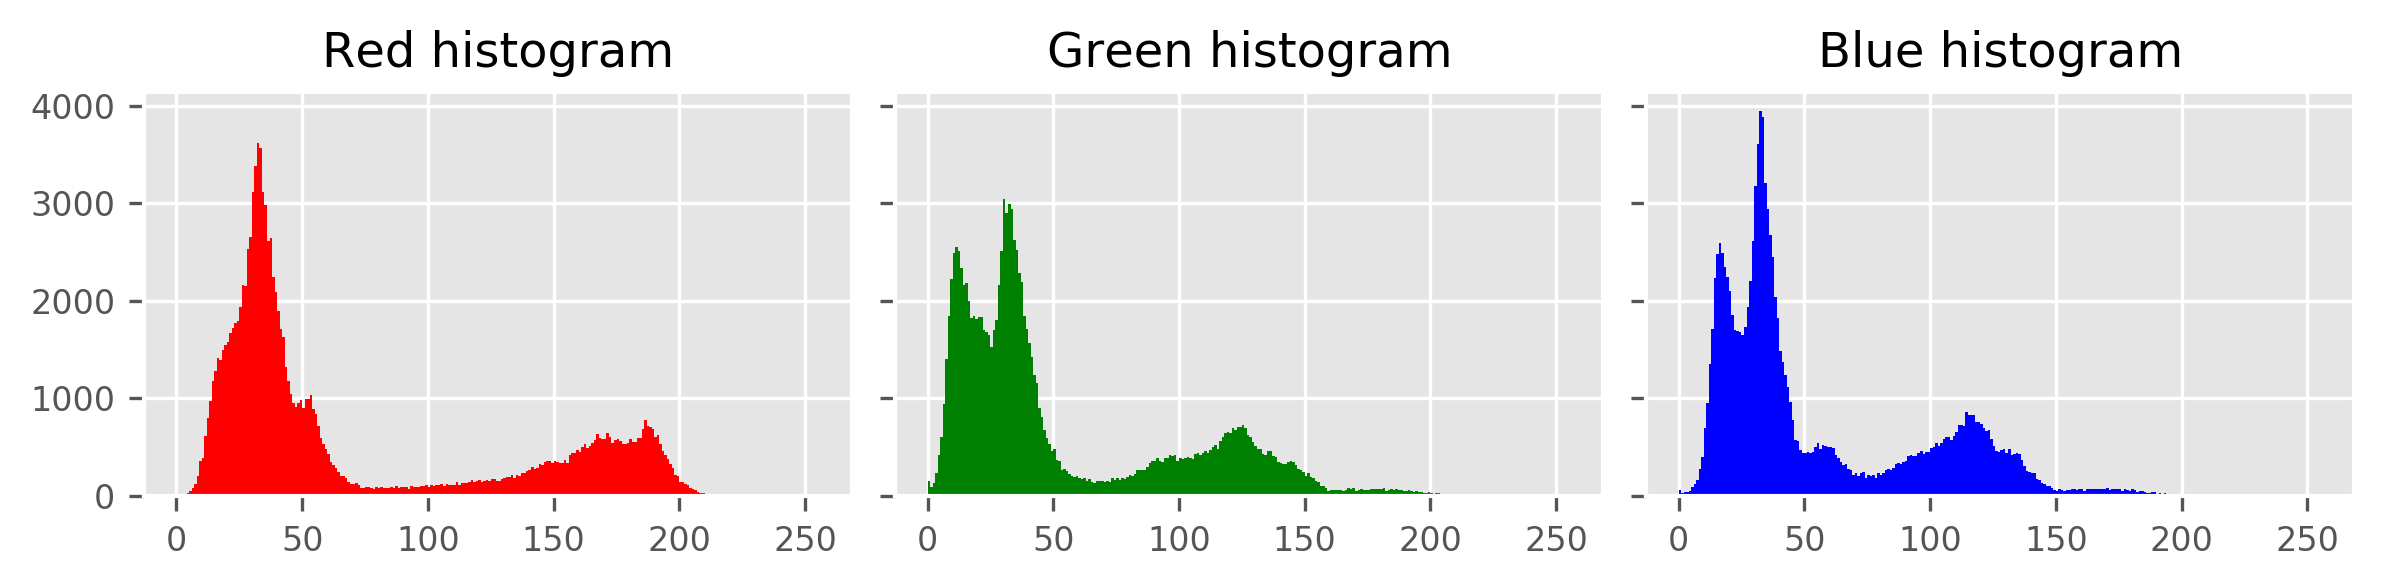

In [2]:
plt.style.use('ggplot')
font = {'size'   : 8}

matplotlib.rc('font', **font)

flat_len = img.shape[0] * img.shape[1]

img_r = [0] * (flat_len)
img_g = [0] * (flat_len)
img_b = [0] * (flat_len)

for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        img_r[i * img.shape[1] + j] = img[i][j][0]
        img_g[i * img.shape[1] + j] = img[i][j][1]
        img_b[i * img.shape[1] + j] = img[i][j][2]

f, (axR, axG, axB) = plt.subplots(1, 3, sharey=True)
f.set_dpi(300)
f.set_size_inches(8, 2)
axR.hist(img_r, 256, [0, 256], color='r')
axR.set_title("Red histogram")
axG.hist(img_g, 256, [0, 256], color='g')
axG.set_title("Green histogram")
axB.hist(img_b, 256, [0, 256], color='b')
axB.set_title("Blue histogram")

plt.tight_layout()
plt.show()

In [3]:
import numpy as np

def map_matrix(fun, matrix, square_size=1):
    if square_size == 1:
        res = np.empty((matrix.shape[0], matrix.shape[1]))
    else:
        res = np.empty((matrix.shape[0], matrix.shape[1], square_size))
    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            res[i][j] = fun(matrix[i][j])
    return res

**Keep only red as gray scale**

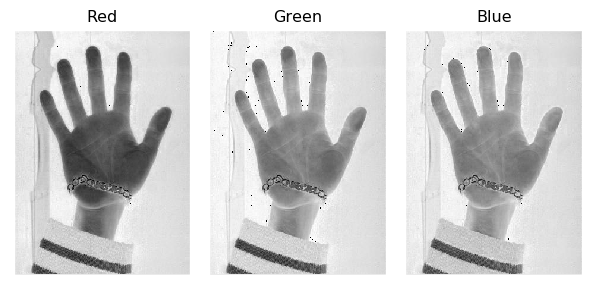

In [4]:
#plt.imshow(map_matrix(lambda x: [x[0], x[0], x[0]], img, square_size=3))
f, (red_img, green_img, blue_img) = plt.subplots(1, 3)
f.set_dpi(100)

red_img.imshow(map_matrix(lambda x: [x[0]] * 3, img, square_size=3))
red_img.set_xticks([]), red_img.set_yticks([])  # to hide tick values on X and Y axis
red_img.set_title("Red")

green_img.imshow(map_matrix(lambda x: [x[1]] * 3, img, square_size=3))
green_img.set_xticks([]), green_img.set_yticks([])  # to hide tick values on X and Y axis
green_img.set_title("Green")

blue_img.imshow(map_matrix(lambda x: [x[2]] * 3, img, square_size=3))
blue_img.set_xticks([]), blue_img.set_yticks([])  # to hide tick values on X and Y axis
blue_img.set_title("Blue")

plt.tight_layout()
plt.show()

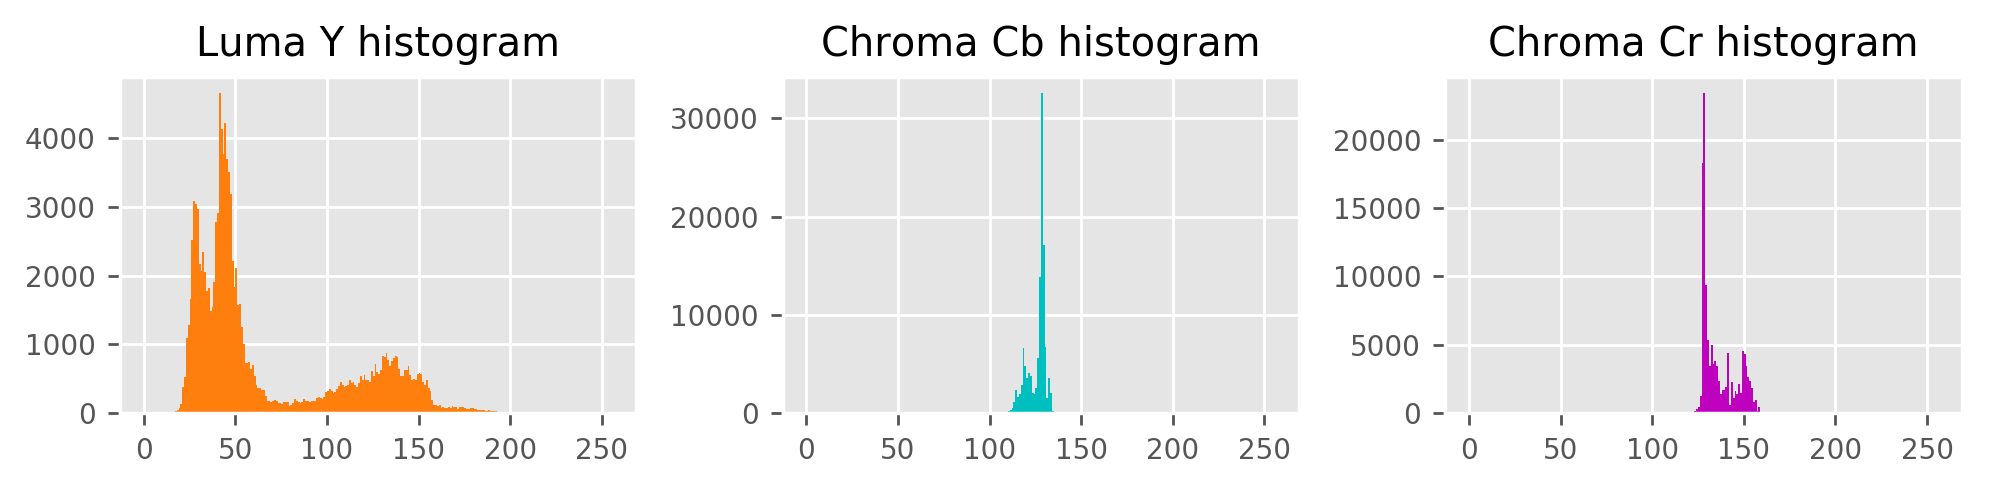

In [5]:
import skimage.color

img_ycbcr = skimage.color.rgb2ycbcr(img)
flat_len = img_ycbcr.shape[0] * img_ycbcr.shape[1]

img_y = [0] * (flat_len)
img_cb = [0] * (flat_len)
img_cr = [0] * (flat_len)

for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        img_y[i * img.shape[1] + j] = img_ycbcr[i][j][0]
        img_cb[i * img.shape[1] + j] = img_ycbcr[i][j][1]
        img_cr[i * img.shape[1] + j] = img_ycbcr[i][j][2]

f, (axY, axCB, axCR) = plt.subplots(1, 3)
f.set_dpi(250)
f.set_size_inches(8, 2)
axY.hist(img_y, 256, [0, 256], color='tab:orange')
axY.set_title("Luma Y histogram")
axCB.hist(img_cb, 256, [0, 256], color='c')
axCB.set_title("Chroma Cb histogram")
axCR.hist(img_cr, 256, [0, 256], color='m')
axCR.set_title("Chroma Cr histogram")

plt.tight_layout()
plt.show()

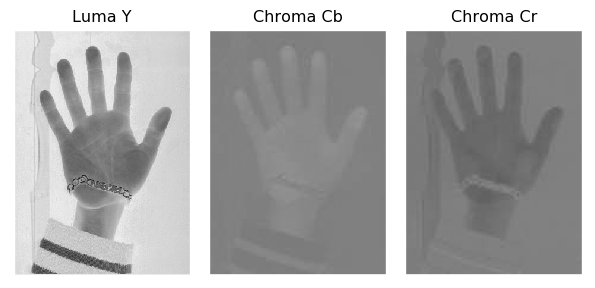

In [6]:
f, (y_img, cb_img, cr_img) = plt.subplots(1, 3)
f.set_dpi(100)

y_img.imshow(map_matrix(lambda x: [int(x[0])]*3, img_ycbcr, square_size=3))
y_img.set_xticks([]), y_img.set_yticks([])  # to hide tick values on X and Y axis
y_img.set_title("Luma Y")

cb_img.imshow(map_matrix(lambda x: [int(x[1])]*3, img_ycbcr, square_size=3))
cb_img.set_xticks([]), cb_img.set_yticks([])  # to hide tick values on X and Y axis
cb_img.set_title("Chroma Cb")

cr_img.imshow(map_matrix(lambda x: [int(x[2])]*3, img_ycbcr, square_size=3))
cr_img.set_xticks([]), cr_img.set_yticks([])  # to hide tick values on X and Y axis
cr_img.set_title("Chroma Cr")

plt.tight_layout()
plt.show()

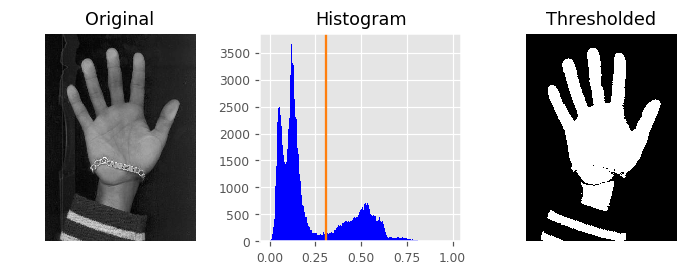

In [7]:
from skimage.filters import threshold_otsu
import skimage.color 

img_gray = skimage.color.rgb2gray(img)

def otsu(img_gray, color='b'):
    thresh = threshold_otsu(img_gray)
    binary = img_gray > thresh
    
    fig, axes = plt.subplots(ncols=3, figsize=(8, 2.5))
    fig.set_dpi(110)
    ax = axes.ravel()
    ax[0] = plt.subplot(1, 3, 1, adjustable='box-forced')
    ax[1] = plt.subplot(1, 3, 2)
    ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0], adjustable='box-forced')

    ax[0].imshow(img_gray, cmap=plt.cm.gray)
    ax[0].set_title('Original')
    ax[0].axis('off')

    ax[1].hist(img_gray.ravel(), bins=256, color=color)
    ax[1].set_title('Histogram')
    ax[1].axvline(thresh, color='tab:orange')

    ax[2].imshow(binary, cmap=plt.cm.gray)
    ax[2].set_title('Thresholded')
    ax[2].axis('off')

    plt.show()
    
    return binary
    
_ = otsu(img_gray)

### Red Otsu

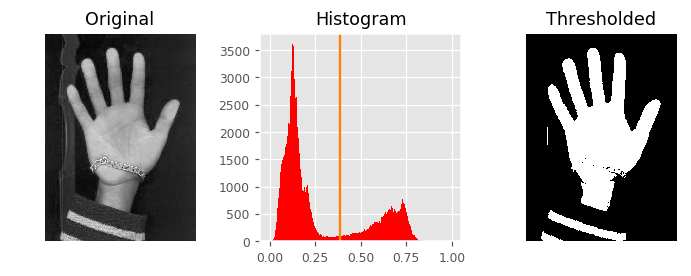

In [8]:
red_img = map_matrix(lambda x: x[0]/255, img)
red_img = otsu(red_img, color='r')

### Green Otsu

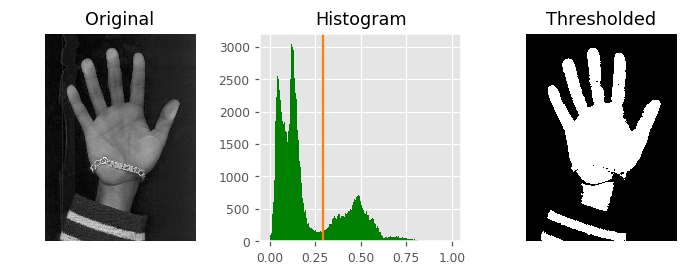

In [9]:
green_img = map_matrix(lambda x: x[1]/255, img)
green_img = otsu(green_img, color='g')

### Blue Otsu

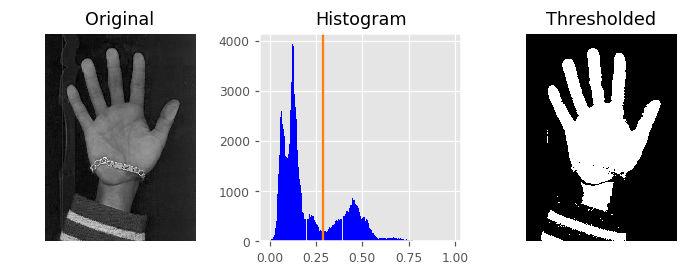

In [10]:
blue_img = map_matrix(lambda x: x[2]/255, img)
blue_img = otsu(blue_img, 'b')

### Luma Y Otsu

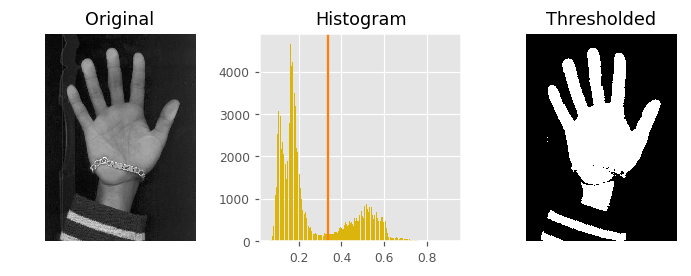

In [11]:
luma_y_img = map_matrix(lambda x: int(x[0])/255, img_ycbcr)
luma_y_img = otsu(luma_y_img, color='xkcd:gold')

### Chroma Cb Otsu

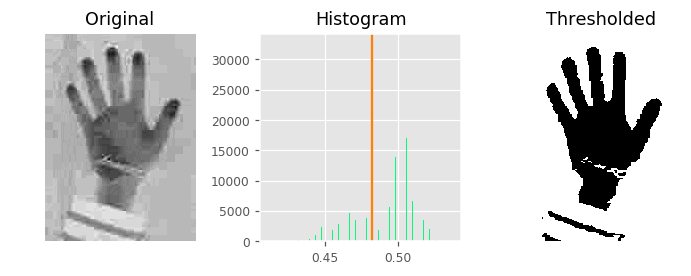

In [12]:
chroma_cb_img = map_matrix(lambda x: int(x[1])/255, img_ycbcr)
chroma_cb_img = otsu(chroma_cb_img, color='xkcd:minty green')

### Chroma Cr Otsu

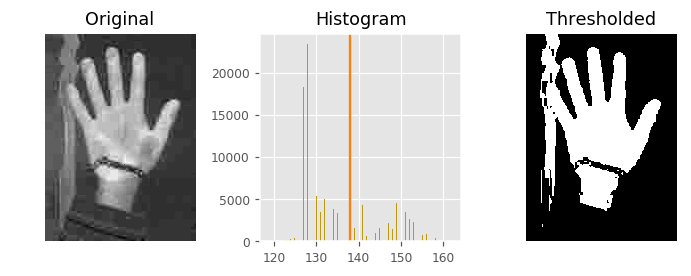

In [13]:
chroma_cr_img = map_matrix(lambda x: int(x[2]), img_ycbcr)
chroma_cr_img = otsu(chroma_cr_img, color='xkcd:ocher')

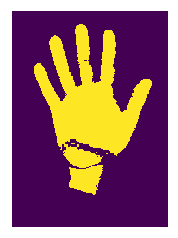

In [14]:
_img = green_img & chroma_cr_img
plt.imshow(_img)
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

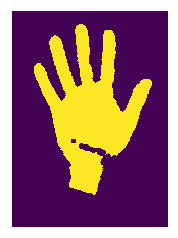

In [15]:
import skimage.morphology

_img = skimage.morphology.closing(_img, skimage.morphology.disk(4))
plt.imshow(_img)
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

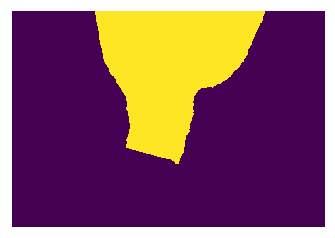

In [16]:
_img_bot = skimage.morphology.closing(_img[int(len(_img)/2):], skimage.morphology.disk(13))
plt.imshow(_img_bot)
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

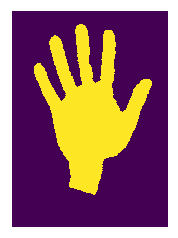

In [17]:
hand = list(_img[:int(len(_img)/2)]) + list(_img_bot)
plt.imshow(hand)
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

### Bracelet

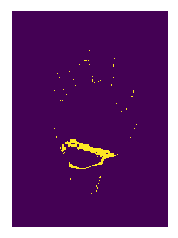

In [18]:
_img_brac = green_img & chroma_cr_img #Image with bracelet

_img = skimage.morphology.closing(_img, skimage.morphology.disk(4))
_img_bot = skimage.morphology.closing(_img[int(len(_img)/2):], skimage.morphology.disk(13))

_img_brac = hand ^ _img_brac #Xoring result with only the bracelet

plt.imshow(_img_brac)
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

It remain some noise need to pass image into low-frequency filter

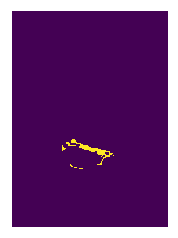

In [19]:
# A very simple and very narrow lowpass filter
kernel = np.array([[1/9., 1/9., 1/9.],
                   [1/9., 1/9., 1/9.],
                   [1/9., 1/9., 1/9.]])
lowpass_brac = ndimage.convolve(_img_brac, kernel)
plt.imshow(lowpass_brac)
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

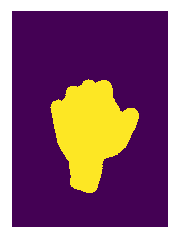

In [20]:
no_finger = skimage.morphology.opening(hand, skimage.morphology.disk(15))
plt.imshow(no_finger)
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

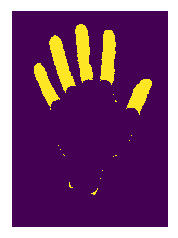

In [21]:
finger = no_finger ^ hand
plt.imshow(finger)
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

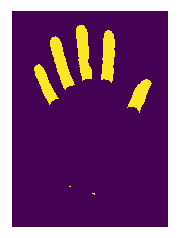

In [22]:
kernel = np.array([[1/9., 1/9., 1/9.],
                   [1/9., 1/9., 1/9.],
                   [1/9., 1/9., 1/9.]])
lowpass_fingers = ndimage.convolve(finger, kernel)
plt.imshow(lowpass_fingers)
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

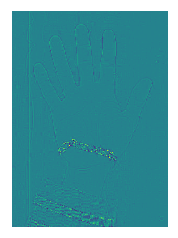

In [23]:
kernel = np.array([[-1, -1, -1],
                   [-1,  8, -1],
                   [-1, -1, -1]])
_img_lowpass = ndimage.convolve(img_gray, kernel)
plt.imshow(_img_lowpass)
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

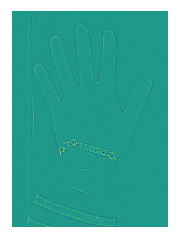

In [24]:
kernel = np.array([[-1, -1, -1, -1, -1],
                   [-1,  1,  2,  1, -1],
                   [-1,  2,  4,  2, -1],
                   [-1,  1,  2,  1, -1],
                   [-1, -1, -1, -1, -1]])
_img_lowpass = ndimage.convolve(img_gray, kernel)
plt.imshow(_img_lowpass)
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()